<a href="https://colab.research.google.com/github/jtndr26/McDonalds/blob/main/McDonalds_Market_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study: Fast Food - McDonald's 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np, pandas as pd
pd.set_option('display.max_columns',None)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Feynn_Labs/mcdonalds.csv')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
df.shape

(1453, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [ ]:
df.describe([.75,.80,.90,.99])

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
50%,45.000000
75%,57.000000
80%,59.000000
90%,63.000000
99%,70.000000
max,71.000000


In [ ]:
df['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [ ]:
mc_df = df.iloc[:,:11]
mc_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [ ]:
mc_df.shape

(1453, 11)

In [ ]:
for i in mc_df.columns.tolist():
  mc_df[i] = mc_df[i].apply(lambda x: 1 if x == 'Yes' else 0)
mc_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [ ]:
mc_df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(random_state = 0)
pca.fit(mc_df)

PCA(random_state=0)

In [ ]:
print(pca.components_)

[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.07691443 -0.26134151 -0.17822612 -0.21087805]
 [-0.28051863 -0.05973793  0.70763705 -0.38594277  0.03616962 -0.08684577
  -0.04044934  0.36045348 -0.06838452 -0.34961569 -0.02679159]
 [ 0.01304117 -0.11307868  0.37593402  0.5

In [ ]:
pca.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [ ]:
var_cum = np.cumsum(pca.explained_variance_ratio_)
print(var_cum)

[0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [ ]:
cols = mc_df.columns
pca_df = pd.DataFrame({'Features':cols,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3],'PC5':pca.components_[4],
                       'PC6':pca.components_[5],'PC7':pca.components_[6],'PC8':pca.components_[7],'PC9':pca.components_[8],'PC10':pca.components_[9],
                       'PC11':pca.components_[10]})
pca_df

,Features,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
1,convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
2,spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
3,fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
4,greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
5,fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
6,cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
7,tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
8,expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069
9,healthy,-0.213711,0.076593,0.192051,0.763488,0.287846,-0.178226,-0.349616,0.176303,-0.185572,-0.038117,0.157608


In [ ]:
pca_df.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,-0.058641,0.040820,-0.172914,0.111824,-0.031613,-0.195871,-0.017639,0.018674,0.018453,0.002284,-0.055044
std,0.310189,0.313316,0.259058,0.293675,0.314485,0.240412,0.315686,0.315621,0.315635,0.316219,0.310913
min,-0.476933,-0.610633,-0.802373,-0.354139,-0.729209,-0.594632,-0.385943,-0.627799,-0.639086,-0.665818,-0.541616
25%,-0.275448,-0.075406,-0.295854,-0.049955,-0.169936,-0.351458,-0.183682,-0.125660,-0.116497,-0.092959,-0.264973
50%,-0.108493,0.016414,-0.088571,0.067816,-0.003125,-0.210878,-0.059738,0.013041,-0.002847,-0.005338,0.019552
75%,0.210337,0.191956,-0.049767,0.225790,0.192769,-0.090078,0.004689,0.158182,0.121133,0.159358,0.149669
max,0.374753,0.601286,0.192051,0.763488,0.361399,0.209347,0.707637,0.589622,0.572403,0.454399,0.339265


In [ ]:
pca_df.columns

Index(['Features', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8',
       'PC9', 'PC10', 'PC11'],
      dtype='object')

In [ ]:
summary = pd.DataFrame({'components':pca_df.columns[1:]})
import statistics
for i in range(len(summary)):
  summary.loc[i,'Standard Deviation'] = statistics.stdev(pca.components_[i])
  summary['Proportion of Variation'] = pca.explained_variance_ratio_
  summary['Cumulative Proportion'] = np.cumsum(pca.explained_variance_ratio_)
summary

,components,Standard Deviation,Proportion of Variation,Cumulative Proportion
0,PC1,0.310189,0.299447,0.299447
1,PC2,0.313316,0.192797,0.492244
2,PC3,0.259058,0.133045,0.625290
3,PC4,0.293675,0.083096,0.708386
4,PC5,0.314485,0.059481,0.767866
5,PC6,0.240412,0.050300,0.818166
6,PC7,0.315686,0.043849,0.862015
7,PC8,0.315621,0.039548,0.901563
8,PC9,0.315635,0.036761,0.938323
9,PC10,0.316219,0.032353,0.970677


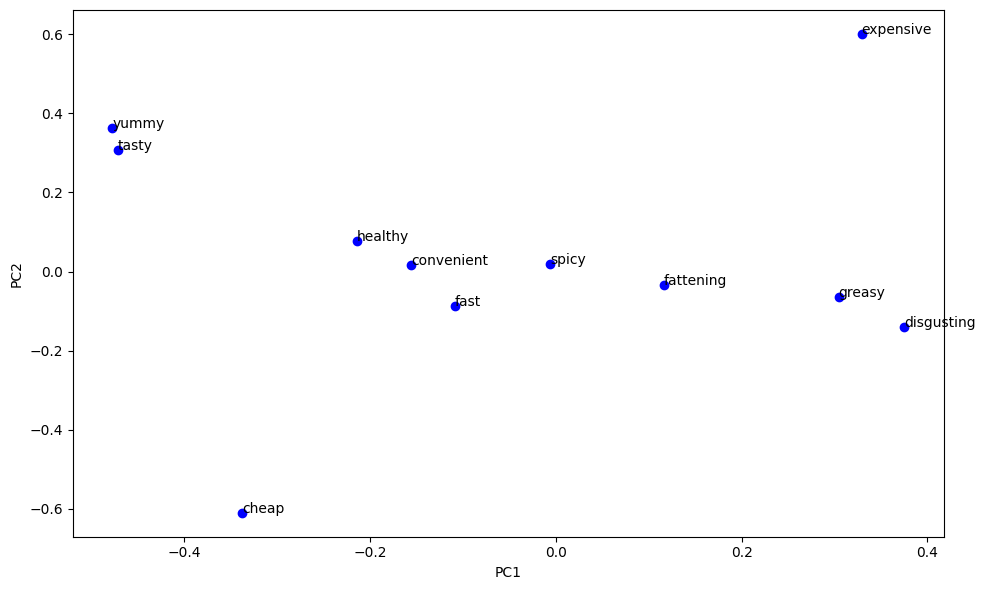

In [ ]:
plt.figure(figsize = (10,6))
plt.scatter(pca_df.PC1,pca_df.PC2,c = 'blue')
plt.xlabel('PC1')
plt.ylabel('PC2')
for i,txt in enumerate(pca_df.Features):
  plt.annotate(txt,(pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.show()

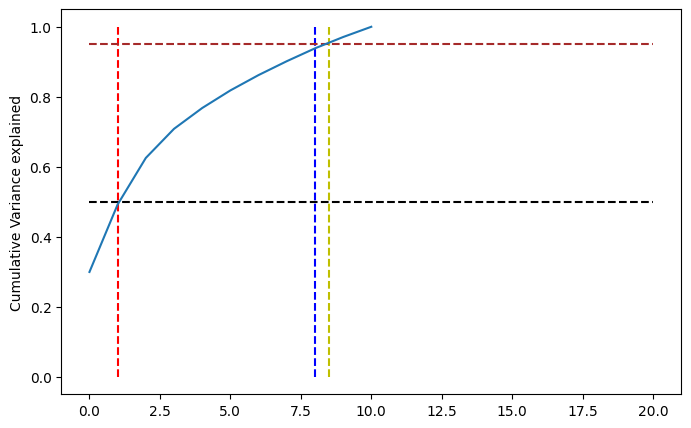

In [ ]:
plt.figure(figsize = (8,5))
plt.vlines(x = [1,8,8.5],ymax = 1,ymin = 0,colors = ['r','b','y','g'],linestyles = '--')
plt.hlines(y = [0.5,0.95],xmax = 20,xmin = 0,colors = ['black','brown'],linestyles = '--')
plt.plot(var_cum)
plt.ylabel('Cumulative Variance explained')
plt.show()

Results from principal components analysis indicate that the first two components capture about 50% of the information contained in the segmentation variables.

In [ ]:
# function to understand the variance for different n_components
def pca_variance(n_components):
  pca= PCA(n_components = n_components)
  pca.fit(mc_df)
  print('Variance explained by {} components:{}'.format(n_components,round(sum(pca.explained_variance_ratio_),4)))

In [ ]:
for i in range(2,9):
  pca_variance(i)

Variance explained by 2 components:0.4922
Variance explained by 3 components:0.6253
Variance explained by 4 components:0.7084
Variance explained by 5 components:0.7679
Variance explained by 6 components:0.8182
Variance explained by 7 components:0.862
Variance explained by 8 components:0.9016


**We're using all the Features**

In [ ]:
mc_pca = pca.fit_transform(mc_df)
mc_pca.shape

(1453, 11)

## K-Mean Clusturing

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer 
kmeans = KMeans(n_clusters = 4,max_iter = 50) # Trying a random of 4 clusters
kmeans.fit(mc_pca)

KMeans(max_iter=50, n_clusters=4)

### Finding Optimal number of Clusters : Silhouette Analysis

For n_clusters = 2, silhouette score is 0.24441701822416792


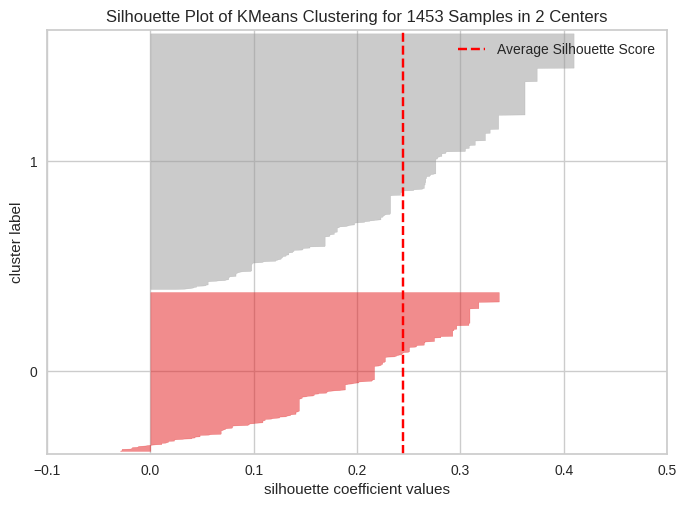

For n_clusters = 3, silhouette score is 0.2391497955916425


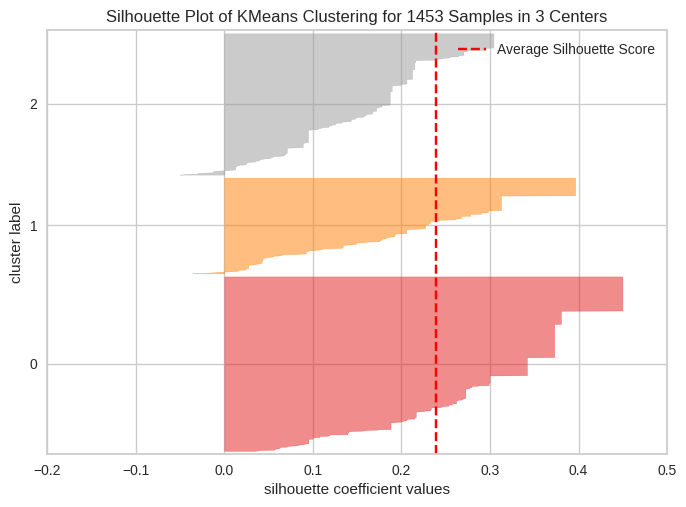

For n_clusters = 4, silhouette score is 0.25855123898177595


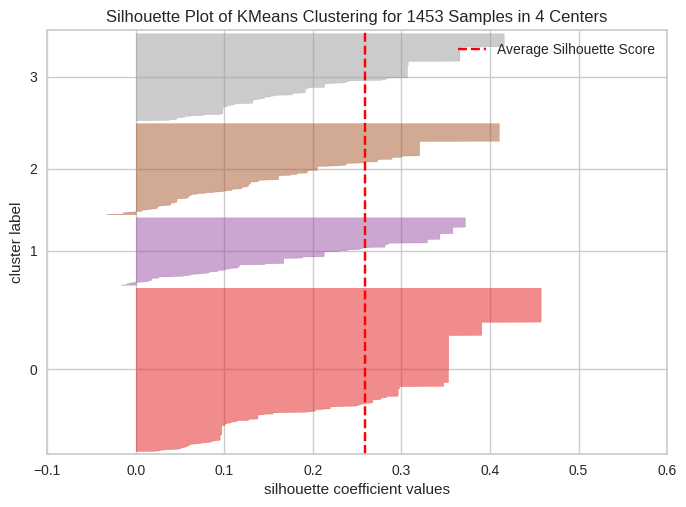

For n_clusters = 5, silhouette score is 0.24224375522235392


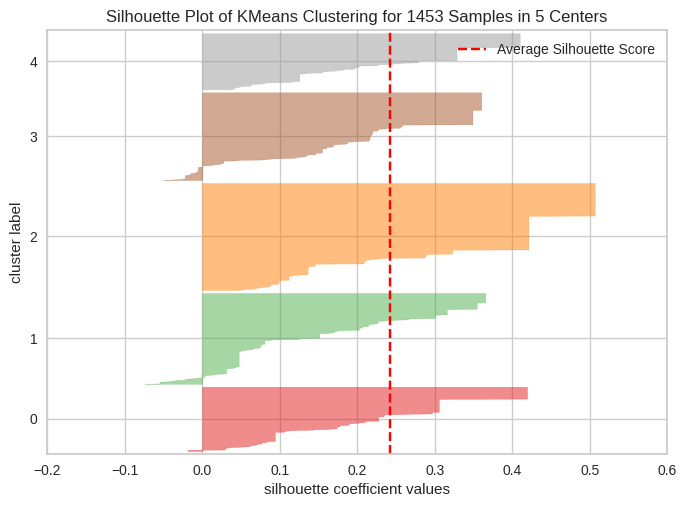

For n_clusters = 6, silhouette score is 0.27045697076844655


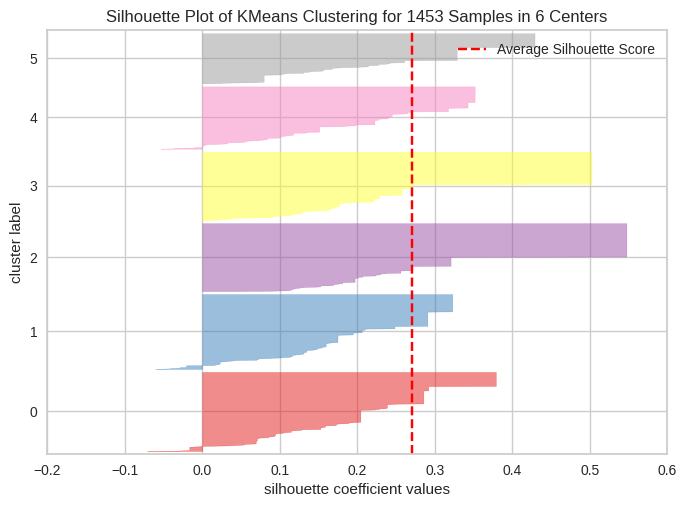

For n_clusters = 7, silhouette score is 0.26874685955727856


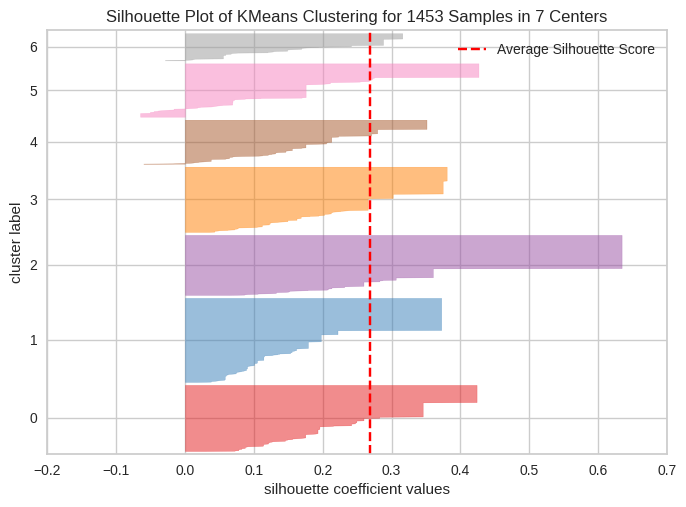

For n_clusters = 8, silhouette score is 0.2889887189615318


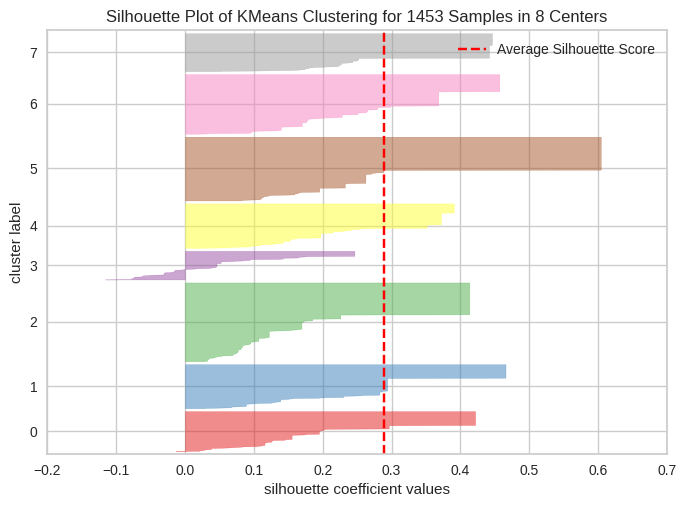

For n_clusters = 9, silhouette score is 0.29912657670815385


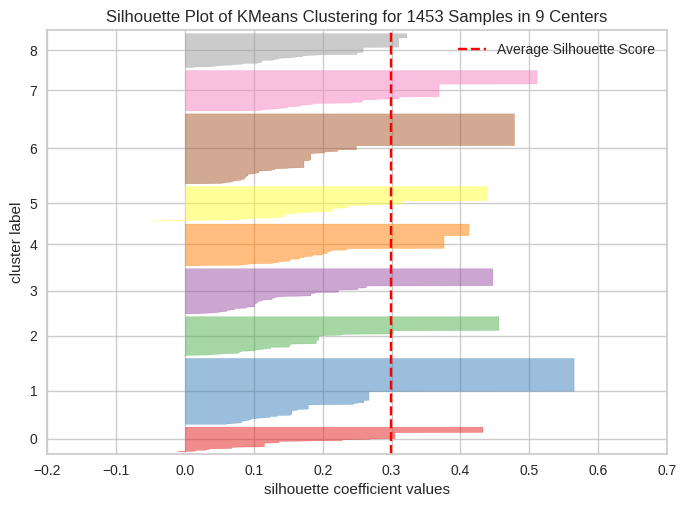

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters)
      preds = km.fit_predict(mc_pca)
      centers = km.cluster_centers_

      score = silhouette_score(mc_pca, preds, metric = 'euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(mc_pca) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data
   
silhouette(10) 

## <u>Use the KElbowVisualizer to find the optimal number of clusters $K_{optimal}$. </u>

### The elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(3, 10),
                 locate_elbow=False, timings=False)

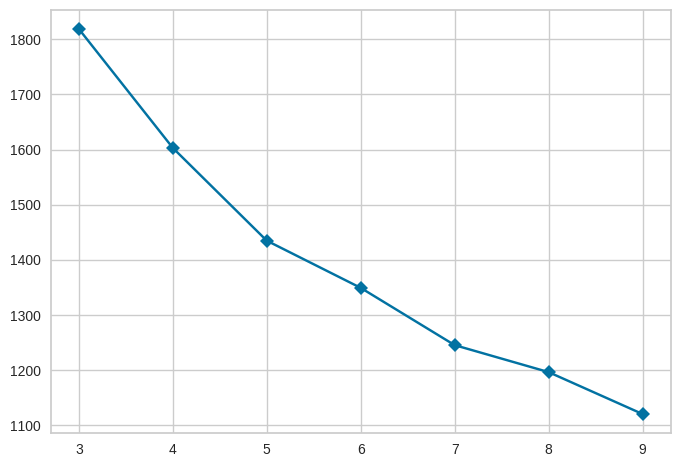

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(3,10), metric='distortion', timings=False, locate_elbow=False
)

visualizer.fit(mc_pca)        # Fit the data to the visualizer

In second graph, we can say that we get the best no. of cluster as 8 because we get elbow at 8. from silhouette score also we can say that it is highest at 8 i.e. 0.2955.

In [ ]:
# Final model with 8 Clusters
kmeans = KMeans(n_clusters = 8,max_iter = 50)
kmeans.fit(mc_pca)
kmeans.labels_

array([7, 0, 1, ..., 6, 3, 4], dtype=int32)

In [ ]:
mc_pca

array([[ 0.42536706, -0.21907878,  0.6632553 , ...,  0.18100693,
         0.51570617, -0.56707389],
       [-0.21863768,  0.38818996, -0.73082668, ...,  0.11147641,
         0.49331285, -0.50044033],
       [ 0.37541475,  0.73043507, -0.12203978, ..., -0.32228786,
         0.06175857,  0.24274108],
       ...,
       [-0.18589445,  1.06266156,  0.22085675, ...,  0.03825472,
         0.05651822, -0.01279977],
       [-1.18206441, -0.03856977,  0.56156066, ...,  0.02226748,
        -0.00257265, -0.10531631],
       [ 1.55024186,  0.27503101, -0.01373727, ..., -0.13658866,
        -0.43279782, -0.45607556]])

In [ ]:
cluster = mc_df.copy()
cluster['labels'] = kmeans.labels_
cluster.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,labels
0,0,1,0,1,0,1,1,0,1,0,0,7
1,1,1,0,1,1,1,1,1,1,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,1
3,1,1,0,1,1,1,1,1,0,0,1,0
4,0,1,0,1,1,1,1,0,0,1,0,7


In [ ]:
cluster['labels'].value_counts()

0    257
5    234
7    183
4    172
6    170
1    167
3    149
2    121
Name: labels, dtype: int64

In [ ]:
cluster.index

RangeIndex(start=0, stop=1453, step=1)

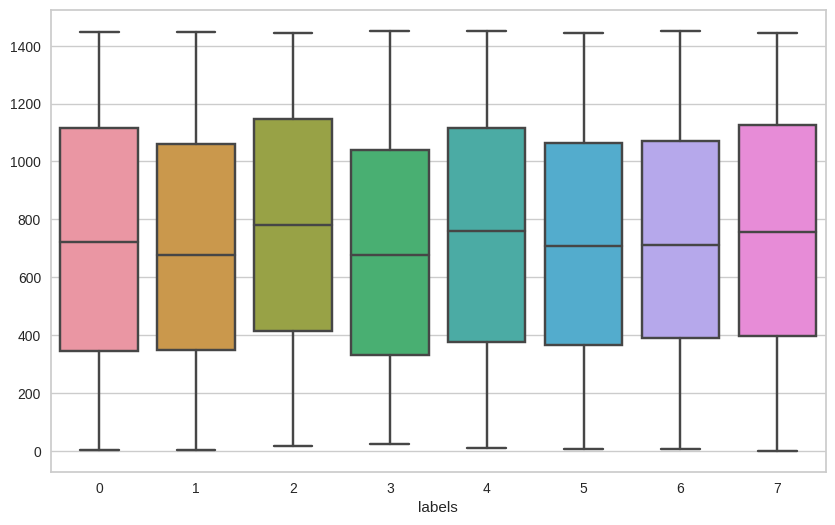

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(data = cluster,x = 'labels',y = cluster.index)
plt.show()

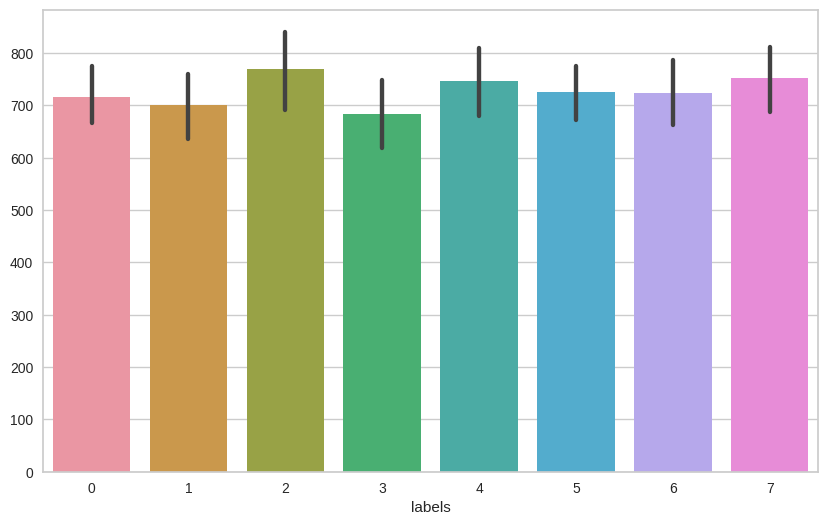

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(data = cluster,x = 'labels',y = cluster.index)
plt.show()

## Hierarchical Clustering

In [ ]:
from scipy.cluster.hierarchy import linkage ,dendrogram,cut_tree

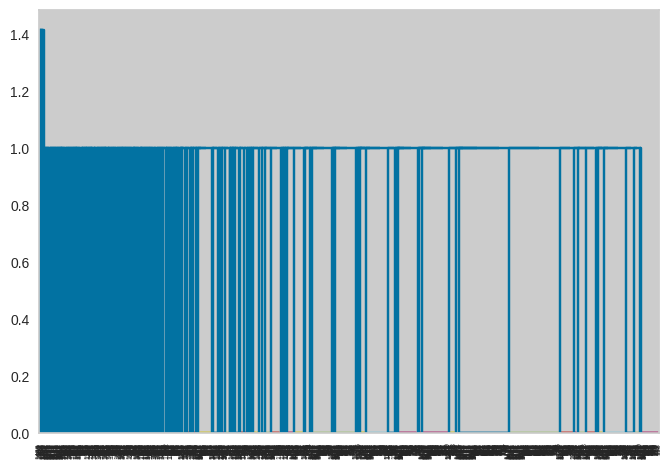

In [ ]:
# Single Linkage
mergings = linkage(mc_df,method = 'single',metric = 'euclidean')
dendrogram(mergings)
plt.show()

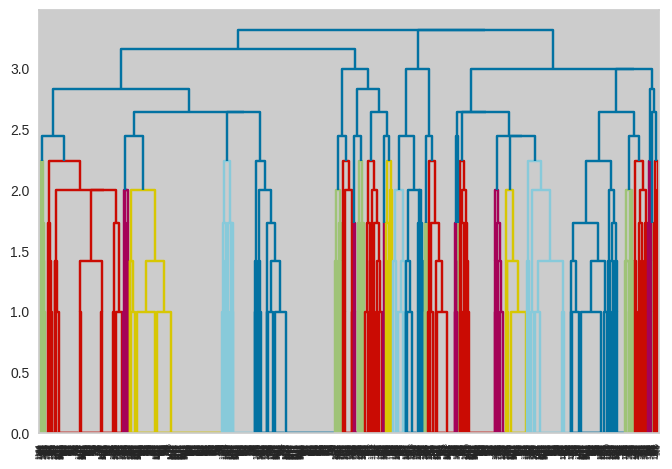

In [ ]:
# Complete Linkage
mergings = linkage(mc_pca,method = 'complete',metric = 'euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
# Using 4 clusters
cluster_labels = cut_tree(mergings,n_clusters = 4).reshape(-1,)
cluster_labels

array([0, 1, 1, ..., 0, 3, 2])

In [ ]:
#predict the labels of clusters.
cluster['cluster_label'] = cluster_labels
cluster.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,labels,cluster_label
0,0,1,0,1,0,1,1,0,1,0,0,7,0
1,1,1,0,1,1,1,1,1,1,0,0,0,1
2,0,1,1,1,1,1,0,1,1,1,0,1,1
3,1,1,0,1,1,1,1,1,0,0,1,0,2
4,0,1,0,1,1,1,1,0,0,1,0,7,3


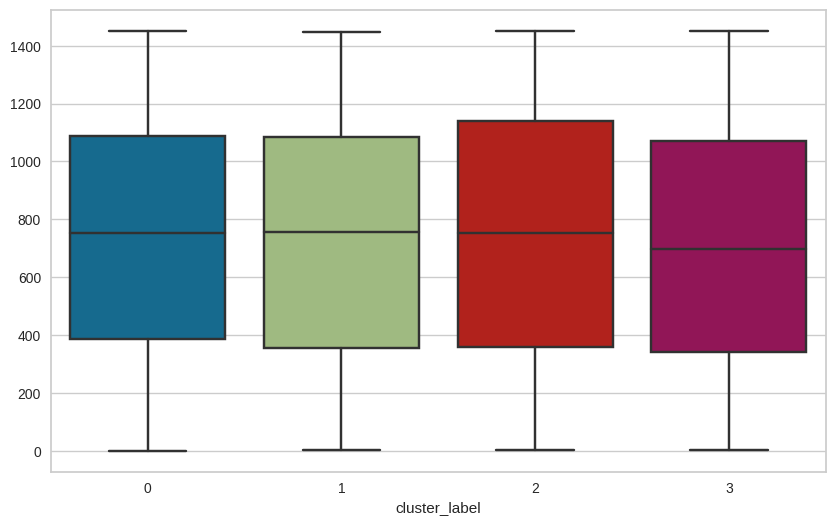

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(data = cluster,x = 'cluster_label',y = cluster.index)
plt.show()

In [ ]:
cluster['cluster_label'].value_counts()

3    693
0    479
2    145
1    136
Name: cluster_label, dtype: int64

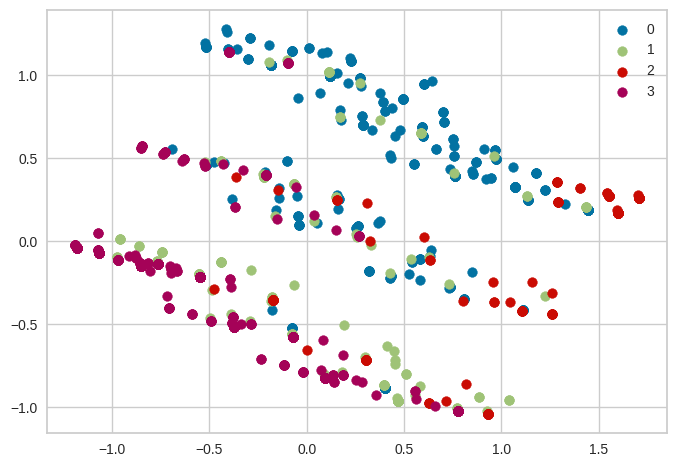

In [ ]:
#Getting unique labels
u_labels = np.unique(cluster_labels)
 
#plotting the results:
for i in u_labels:
    plt.scatter(mc_pca[cluster_labels == i , 0] , mc_pca[cluster_labels == i , 1], label = i,cmap='flag')
plt.legend()
plt.show()